In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [4]:
hcc = pd.read_excel('/content/hcc-data-complete-balanced.xlsx')
hcc.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,"7,1","0,7",1,"3,5","0,5","52,5",37,856,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7,"0,58",1,"1,8","0,85",32,10,18,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,"2,1",5,13,"0,1",28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,"8,1","1,11",2,"15,7","0,2",131,78,1316,0
4,1,1,1,1,0,1,0,1,0,1,...,109,"6,9","1,8",1,9,"0,1",59,15,22,1



Data Preprocessing

In [5]:
hcc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          204 non-null    int64 
 1   Symptoms        204 non-null    int64 
 2   Alcohol         204 non-null    int64 
 3   HBsAg           204 non-null    int64 
 4   HBeAg           204 non-null    int64 
 5   HBcAb           204 non-null    int64 
 6   HCVAb           204 non-null    int64 
 7   Cirrhosis       204 non-null    int64 
 8   Endemic         204 non-null    int64 
 9   Smoking         204 non-null    int64 
 10  Diabetes        204 non-null    int64 
 11  Obesity         204 non-null    int64 
 12  Hemochro        204 non-null    int64 
 13  AHT             204 non-null    int64 
 14  CRI             204 non-null    int64 
 15  HIV             204 non-null    int64 
 16  NASH            204 non-null    int64 
 17  Varices         204 non-null    int64 
 18  Spleno    

In [6]:
# Convert entire DataFrame to string

hcc = hcc.applymap(str)
print(hcc.dtypes)

Gender            object
Symptoms          object
Alcohol           object
HBsAg             object
HBeAg             object
HBcAb             object
HCVAb             object
Cirrhosis         object
Endemic           object
Smoking           object
Diabetes          object
Obesity           object
Hemochro          object
AHT               object
CRI               object
HIV               object
NASH              object
Varices           object
Spleno            object
PHT               object
PVT               object
Metastasis        object
Hallmark          object
Age               object
Grams_day         object
Packs_year        object
PS                object
Encephalopathy    object
Ascites           object
INR               object
AFP               object
Hemoglobin        object
MCV               object
Leucocytes        object
Platelets         object
Albumin           object
Total_Bil         object
ALT               object
AST               object
GGT               object



Replacing ',' by '.'

In [7]:
data = hcc.applymap(lambda x: str(x.replace(',','.')))


In [8]:
data.head()


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,52.5,37,856,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7,0.58,1,1.8,0.85,32,10,18,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,131,78,1316,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,0.1,59,15,22,1


In [9]:
# Converting columns to type float

data = data.astype("float")
print(data.dtypes)

Gender            float64
Symptoms          float64
Alcohol           float64
HBsAg             float64
HBeAg             float64
HBcAb             float64
HCVAb             float64
Cirrhosis         float64
Endemic           float64
Smoking           float64
Diabetes          float64
Obesity           float64
Hemochro          float64
AHT               float64
CRI               float64
HIV               float64
NASH              float64
Varices           float64
Spleno            float64
PHT               float64
PVT               float64
Metastasis        float64
Hallmark          float64
Age               float64
Grams_day         float64
Packs_year        float64
PS                float64
Encephalopathy    float64
Ascites           float64
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
Albumin           float64
Total_Bil         float64
ALT               float64
AST         

In [10]:
data.head()


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,150.0,7.1,0.70,1.0,3.5,0.50,52.5,37.0,856.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,120.0,7.0,0.58,1.0,1.8,0.85,32.0,10.0,18.0,1.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,109.0,7.0,2.10,5.0,13.0,0.10,28.0,6.0,16.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,174.0,8.1,1.11,2.0,15.7,0.20,131.0,78.0,1316.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,109.0,6.9,1.80,1.0,9.0,0.10,59.0,15.0,22.0,1.0


spilitting features and labels


In [11]:
X = data.iloc[:,:-1]  # all features of the dataset 
X.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,183.0,150.0,7.1,0.70,1.0,3.5,0.50,52.5,37.0,856.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,77.0,120.0,7.0,0.58,1.0,1.8,0.85,32.0,10.0,18.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,202.0,109.0,7.0,2.10,5.0,13.0,0.10,28.0,6.0,16.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,94.0,174.0,8.1,1.11,2.0,15.7,0.20,131.0,78.0,1316.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,173.0,109.0,6.9,1.80,1.0,9.0,0.10,59.0,15.0,22.0


In [12]:
Y = hcc.iloc[:,-1]  # target label (0 or 1)
Y.head()

0    1
1    1
2    1
3    0
4    1
Name: Class, dtype: object

In [13]:
y = Y.astype(int)
y

0      1
1      1
2      1
3      0
4      1
      ..
199    0
200    0
201    0
202    0
203    0
Name: Class, Length: 204, dtype: int64

In [14]:
print(X)
print(Y)

     Gender  Symptoms  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  \
0       1.0       0.0      1.0    0.0    0.0    0.0    0.0        1.0   
1       0.0       0.0      0.0    0.0    0.0    0.0    1.0        1.0   
2       1.0       0.0      1.0    1.0    0.0    1.0    0.0        1.0   
3       1.0       1.0      1.0    0.0    0.0    0.0    0.0        1.0   
4       1.0       1.0      1.0    1.0    0.0    1.0    0.0        1.0   
..      ...       ...      ...    ...    ...    ...    ...        ...   
199     0.0       0.0      0.0    0.0    0.0    0.0    1.0        1.0   
200     0.0       1.0      1.0    0.0    0.0    0.0    0.0        1.0   
201     1.0       1.0      1.0    0.0    0.0    0.0    0.0        1.0   
202     1.0       1.0      1.0    0.0    0.0    0.0    0.0        1.0   
203     0.0       1.0      0.0    0.0    0.0    0.0    0.0        0.0   

     Endemic  Smoking  ...    GGT    ALP   TP  Creatinine  Nodule  Major_Dim  \
0        0.0      1.0  ...  183.0  150.0  7


Scaling the dataset

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numvars = ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin']
scaler = MinMaxScaler()
X[numvars] = scaler.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

LDA ---- dimensionality reduction

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [18]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [19]:
#Import svm model
from sklearn import svm

In [20]:
#Create a svm Classifier
clf = svm.SVC(C=20,kernel='sigmoid') # Polynomial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [21]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

print("f1 score : ",f1_score(y_test, y_pred, average="macro"))
print("precision : ",precision_score(y_test, y_pred, average="macro"))
print("recall : ",recall_score(y_test, y_pred, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred))

f1 score :  0.7028985507246377
precision :  0.7150000000000001
recall :  0.7047619047619047
accuracy: 0.7073170731707317


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[17  4]
 [ 8 12]]
Accuracy0.7073170731707317


In [ ]:
# Fit the LDA model
# model = LinearDiscriminantAnalysis()
# model.fit(X, Y)

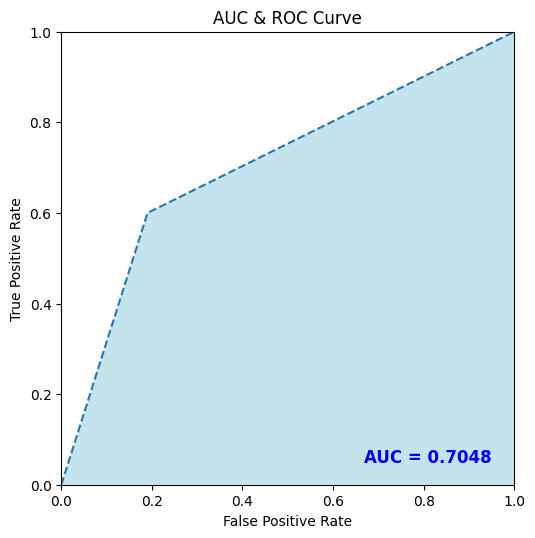

In [23]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


PCA using SVD

In [24]:
### PCA using SVD

X_centered = X - np.mean(X)
X_c = 1/(X.shape[0] - 1) * np.dot(np.transpose(X_centered), X_centered)
u, s, vt = np.linalg.svd(X_c, full_matrices = False)

In [25]:
X_c


array([[ 1.64300203e-01,  9.99710229e-03,  8.01217039e-02, ...,
         2.40241571e-02,  2.53987802e-02,  2.13013515e-02],
       [ 9.99710229e-03,  2.14503043e-01, -7.89626195e-03, ...,
         1.75706058e-04,  9.66553288e-03,  1.53783234e-02],
       [ 8.01217039e-02, -7.89626195e-03,  2.02332657e-01, ...,
         1.60067152e-02,  1.71973962e-02,  2.64125366e-03],
       ...,
       [ 2.40241571e-02,  1.75706058e-04,  1.60067152e-02, ...,
         6.11799043e-02,  4.50090165e-02,  9.18848550e-03],
       [ 2.53987802e-02,  9.66553288e-03,  1.71973962e-02, ...,
         4.50090165e-02,  5.24087403e-02,  2.19623705e-02],
       [ 2.13013515e-02,  1.53783234e-02,  2.64125366e-03, ...,
         9.18848550e-03,  2.19623705e-02,  3.90104823e-02]])

In [26]:
D = s
D = (D/D.sum())*100

print('S : ',s)
print('\nD : ', D)
print('Max(s) : ', s.max())
print('Min(s) : ', s.min())
print('Max(D) : ', D.max())
print('Min(D) : ', D.min())

S :  [7.21046728e-01 4.22332465e-01 3.65837891e-01 3.25698509e-01
 2.63801318e-01 2.32863270e-01 2.03575514e-01 1.91614692e-01
 1.62261393e-01 1.46124477e-01 1.39968550e-01 1.29210953e-01
 1.11915489e-01 1.09193933e-01 9.89042547e-02 9.13694899e-02
 7.87185581e-02 7.25158481e-02 6.48432736e-02 5.31274283e-02
 5.04479331e-02 4.99029942e-02 4.74525419e-02 4.32313713e-02
 3.88607379e-02 3.77887749e-02 3.40064731e-02 2.84304056e-02
 2.73270119e-02 2.46663043e-02 2.22893867e-02 2.08598301e-02
 1.85420666e-02 1.72006452e-02 1.66119416e-02 1.41281604e-02
 1.23278162e-02 1.00087154e-02 8.43175250e-03 7.40307912e-03
 6.16322309e-03 5.55201413e-03 4.73465077e-03 4.32868455e-03
 3.91014288e-03 3.68569813e-03 2.99806844e-03 2.52362151e-03
 3.40135038e-04]

D :  [1.58503920e+01 9.28391303e+00 8.04202243e+00 7.15965947e+00
 5.79900599e+00 5.11891111e+00 4.47509373e+00 4.21216525e+00
 3.56690709e+00 3.21217771e+00 3.07685521e+00 2.84037659e+00
 2.46017948e+00 2.40035295e+00 2.17416035e+00 2.00852757e

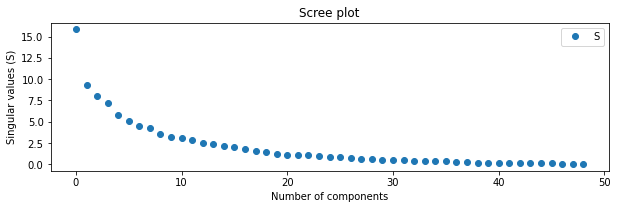

In [27]:
fig = plt.subplots(1,figsize=(10,6))
plt.subplot(211)
plt.xlabel('Number of components')
plt.ylabel('Singular values (S)')
plt.title('Scree plot')

plt.plot(D,'o')
plt.legend('Singular values')

In [ ]:
# Considering the elbow point to be 8 from the scree plot


In [28]:
X_10pcs = (X_centered @ vt[:10].T).rename(columns = {0: 'pc1', 1: 'pc2',2: 'pc3',3: 'pc4',4: 'pc5',5: 'pc6', 6:'pc7', 7:'pc8',8:'pc9',9:'pc10'})
X_10pcs

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.162442,-0.629973,-1.146861,0.000550,0.439264,-0.400459,-0.054846,-0.223027,0.341841,0.137175
1,0.825106,-0.256468,-1.117247,0.087155,-0.864338,-0.167709,-0.558583,-0.122507,-0.442626,0.317589
2,0.182621,-0.329224,0.667420,0.629155,0.059692,-0.511092,0.563964,-0.386887,-0.979362,0.544750
3,0.907619,-1.028135,0.337259,0.715361,0.185362,-0.465693,-0.240251,-0.450746,0.139717,-0.423258
4,0.707936,-0.185357,0.140857,1.190873,0.365239,-0.321138,0.489991,0.635936,-0.669928,-0.014346
...,...,...,...,...,...,...,...,...,...,...
199,0.570544,0.513244,-1.136806,-0.532396,-1.260209,0.330673,-0.015739,-0.435035,0.588540,0.307933
200,0.433362,-0.383604,0.326540,-0.671616,0.162891,-0.315232,-0.090635,0.644356,0.617257,0.764449
201,0.262183,-0.107736,0.306222,-0.356813,0.763042,-0.417377,0.243509,0.683984,0.321821,-0.039108
202,-0.336368,-1.064904,0.823925,-0.382916,-0.910626,0.007617,0.318735,-0.258442,0.217745,-0.253567


 'X_10pcs' is the new reduced set of features




SVM on the dataset
Before dimensionality reduction

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [30]:
from datetime import datetime
start_time = datetime.now()

#Create a svm Classifier
clf = svm.SVC(C=15,kernel='rbf') # Polynomial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.014036


In [31]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

print("f1 score : ",f1_score(y_test, y_pred, average="macro"))
print("precision : ",precision_score(y_test, y_pred, average="macro"))
print("recall : ",recall_score(y_test, y_pred, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred))

f1 score :  0.8528708133971292
precision :  0.857487922705314
recall :  0.8523809523809525
accuracy: 0.8536585365853658


After dimensionality Reduction (PCA-SVM)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_10pcs, y, test_size=0.2, random_state=0)


In [33]:
start_time = datetime.now()

#Create a svm Classifier
clf = svm.SVC(C=8,kernel='poly') # Polynomial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_pca = clf.predict(X_test)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.014642


In [34]:
print("f1 score : ",f1_score(y_test, y_pred_pca, average="macro"))
print("precision : ",precision_score(y_test, y_pred_pca, average="macro"))
print("recall : ",recall_score(y_test, y_pred_pca, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred_pca))

f1 score :  0.7317073170731706
precision :  0.7321428571428572
recall :  0.7321428571428572
accuracy: 0.7317073170731707


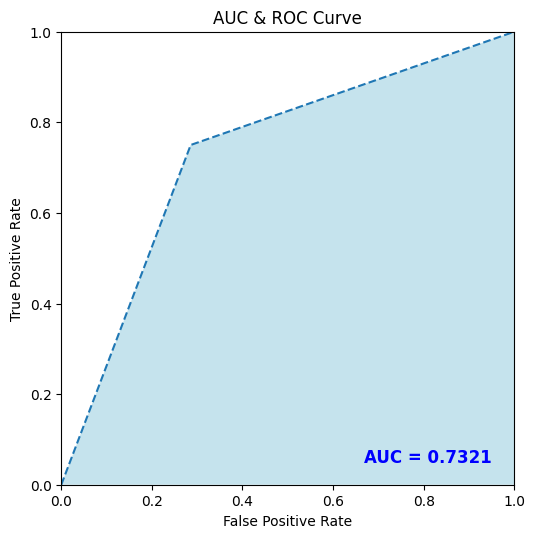

In [35]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_pca)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_pca)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

SVM after PCA - GRIDSEARCH CV


In [36]:
from sklearn.svm import SVC
model = SVC()
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1,10, 15,25], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.485 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.758 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.485 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.485 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 15, 25],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=15, gamma=0.1)


In [38]:
#Create a svm Classifier
clf = svm.SVC(C=15,gamma=0.1, kernel='rbf') # Polynomial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_pcagrid = clf.predict(X_test)

In [39]:
print("f1 score : ",f1_score(y_test, y_pred_pcagrid, average="macro"))
print("precision : ",precision_score(y_test, y_pred_pcagrid, average="macro"))
print("recall : ",recall_score(y_test, y_pred_pcagrid, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred_pcagrid))

f1 score :  0.7291291291291292
precision :  0.7365196078431373
recall :  0.7297619047619048
accuracy: 0.7317073170731707


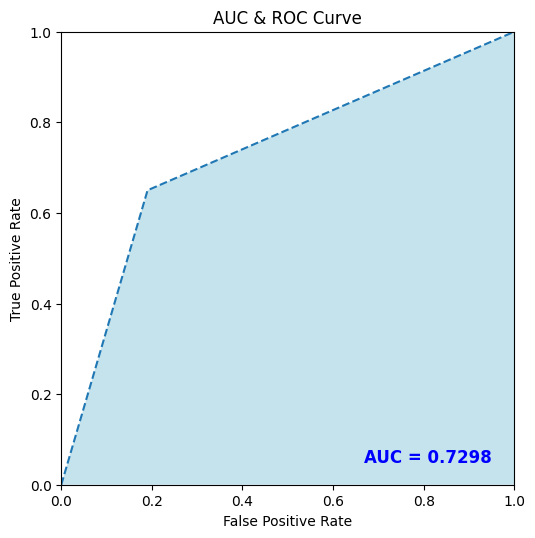

In [40]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test,y_pred_pcagrid)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_pcagrid)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

PCA-OPTIMIZATION-SVM

In [43]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'C': abs(float(params['C'])), 
        "kernel":str(params['kernel'])
    }
    clf2 = svm.SVC(gamma='scale', **params)
    score = cross_val_score(clf, X_10pcs, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss':score, 'status': STATUS_OK }

space = {
    'C': hp.normal('C', 0, 2),
    "kernel":hp.choice('kernel',['linear','poly','rbf','sigmoid'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("SVM: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:01<00:00, 15.16it/s, best loss: 0.7549019607843137]
SVM: Hyperopt estimated optimum {'C': -1.6212379659411842, 'kernel': 2}


In [44]:
#Create a svm Classifier
clf2 = svm.SVC(C=2.127,kernel='sigmoid') # Polynomial Kernel

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test)

print("accuracy:",accuracy_score(y_test, y_pred2))

accuracy: 0.6829268292682927


In [45]:
print("f1 score : ",f1_score(y_test, y_pred2, average="macro"))
print("precision : ",precision_score(y_test, y_pred2, average="macro"))
print("recall : ",recall_score(y_test, y_pred2, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred2))

f1 score :  0.6829268292682926
precision :  0.6833333333333333
recall :  0.6833333333333333
accuracy: 0.6829268292682927


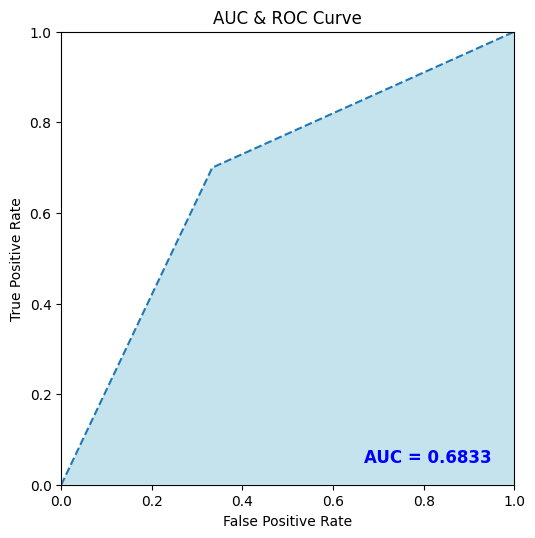

In [46]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred2)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred2)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()